<a href="https://colab.research.google.com/github/Rumaisa1054/Data_Science/blob/main/stats_visuals/stats/variance_std_dev_std_error.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

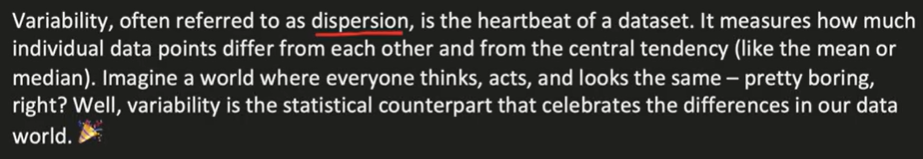

In [ ]:
# numeric data - mean median
# categorical - mode
# we use them in null
'''
population mean uses meu  and N
sample mean uses x_bar and n
'''

# we have to think beyod average -
# variance or spreas should be studied -

#  key terms that help us understand variance
#  1. Range : Minimum data value - Max data value
#  2. IQR : Middle 50% data
#  3. variance :
#  4. standard deviation
#  5. standard error

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = sns.load_dataset('titanic')

In [2]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# **range**

In [ ]:
np.ptp(df['fare']) #  range = max - min : effected by outliers

# **IQR - interquartile range**

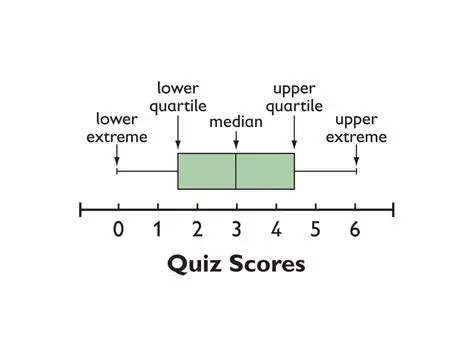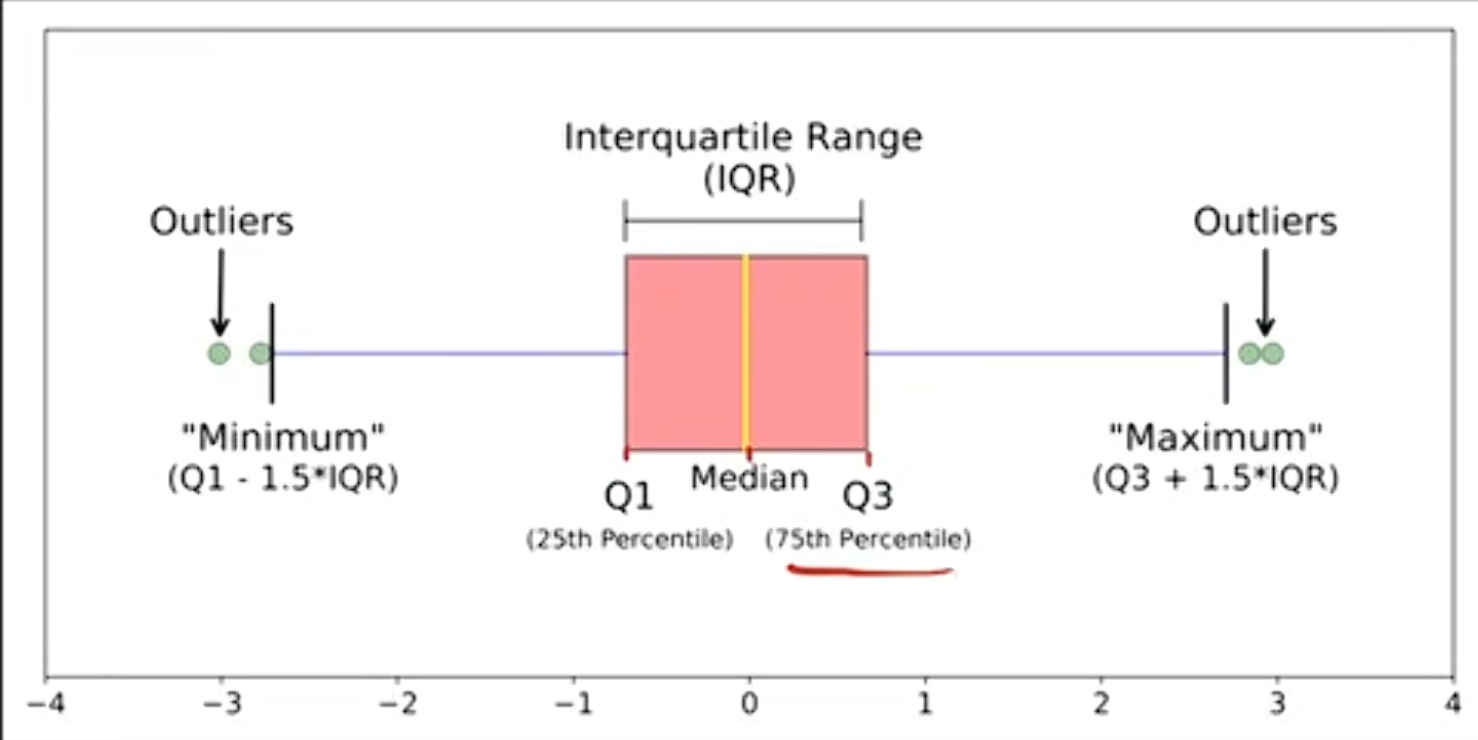

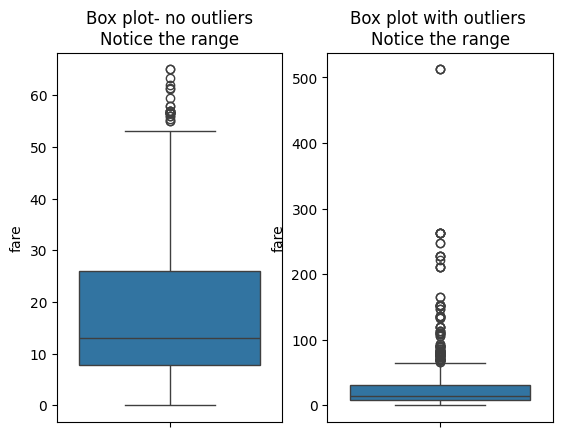

In [32]:
# steps to find iqr
# find the quartiles
# iqr = q3 - q1

q1 = np.percentile(df['fare'].sort_values(),25)
q3 = np.percentile(df['fare'],75)
iqr = q3 - q1
iqr

# min an max without outliters could be foudn using the iqr
lower_bound = q1 - 1.5*iqr
upper_bound = q3 + 1.5*iqr
# anything outside this range is outleirs
outliers = (df['fare'] < lower_bound) | ((df['fare']) > upper_bound)
data_no_outliers = df[~outliers]
plt.subplot(1,2,1)
plt.title("Box plot- no outliers\nNotice the range")
sns.boxplot(data_no_outliers['fare'],orient = 'x')
plt.subplot(1,2,2)
sns.boxplot(df['fare'],orient = 'x')
plt.title("Box plot with outliers \nNotice the range")
plt.show()

In [20]:
print(iqr/2)
print(df['fare'].median())


11.5448
14.4542


# **variance**

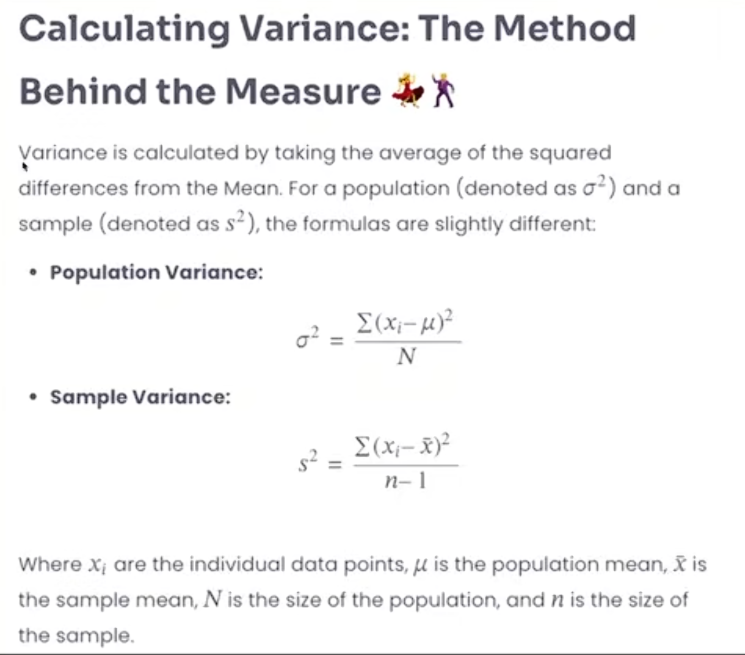

# **why n -1 for sample standard deviation**

When you calculate standard deviation from a sample, you are trying to estimate the true population variance.

But there’s a problem:

A sample is biased — it tends to underestimate the true population variance.This artificially reduces the spread.


To correct for this underestimation, we divide by a smaller number (n−1), which increases the variance slightly — giving us an unbiased estimator.

# **Degrees of Freedom (DF) — Simple Explanation**

## What are Degrees of Freedom?
Degrees of freedom = **how many values are free to vary**.

When calculating **sample variance**, one value becomes “locked” because of the sample mean.  
That’s why we use **n − 1** instead of **n**.

---

# Why is one value locked?

Suppose we have 3 numbers:

x1, x2, x3

And the sample mean is:

x̄ = 10

This gives us the rule:

x1 + x2 + x3 = 30

Now:

- You can choose **any values** for `x1` and `x2`.
- But `x3` is **not free** — it must adjust so the mean stays 10.

Example:

x1 = 5  
x2 = 11

Then:

x3 = 30 − (5 + 11) = 14

You **cannot** choose `x3` freely.  
So out of 3 numbers:

- 2 are free  
- 1 is forced  

### Degrees of freedom = **3 − 1 = 2**

In general:

For n data points, (n − 1) values are free to vary.

---

# Why does this affect variance?

Variance measures spread around the **mean**.  
But the mean was calculated using the same sample, so we “used up” 1 degree of freedom.  
Only **n − 1** values give independent information about the spread.

So we divide by **n − 1**  
instead of **n**.

Otherwise, the variance would be **too small**.

---

# One-sentence Summary
**One value becomes dependent because the sample mean must stay fixed, leaving only (n − 1) free values — so we divide by n − 1 when calculating sample variance.**

The sample mean must stay fixed because the variance formula measures distances around that specific mean — once you choose that mean, the data must satisfy the equation that defines it, locking one value.


We fix the mean because we calculated it first.
✔️ Once the mean is fixed, the data must obey the equation
∑𝑥𝑖 =𝑛 * 𝑥_bar

✔️ That equation removes one degree of freedom.

In [40]:
print(df['fare'].var())
print(np.var(df['fare'],ddof=1))

2469.436845743117
2469.436845743117


In [38]:
df['fare'].var(ddof=1)

2469.436845743117

In [36]:
df['fare'].var(ddof=2)

2472.214614973424

# **standard_dev**

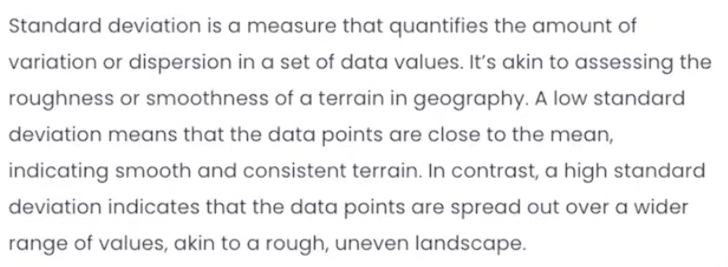

# Summary Table

| Concept            | Formula                                                      | Meaning                                      |
|--------------------|--------------------------------------------------------------|----------------------------------------------|
| Population SD      | σ = √( Σ(xᵢ − μ)² / N )                                       | Spread in whole population                   |
| Sample SD          | s = √( Σ(xᵢ − x̄)² / (n − 1) )                                | Spread in sample (unbiased estimator)        |
| Standard Error     | SE = s / √n                                                  | Precision of the sample mean                 |


In [44]:
print(df['fare'].std())

print(np.std(df['fare']))
print(np.std(df['fare'],ddof = 1))
print(np.std(df['fare'],ddof = 2))

49.693428597180905
49.66553444477411
49.693428597180905
49.72136980186109


In [41]:
# usually written in research papers as mean +- std .the line in barplot in sns shows this std

<Axes: xlabel='sex', ylabel='fare'>

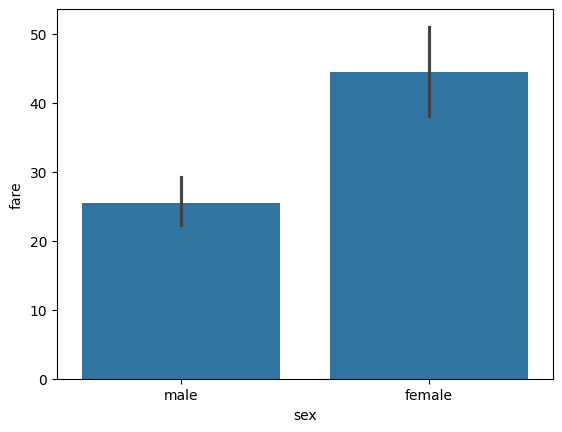

In [42]:
sns.barplot(y=df['fare'],x=df['sex'])

[0 1 2]


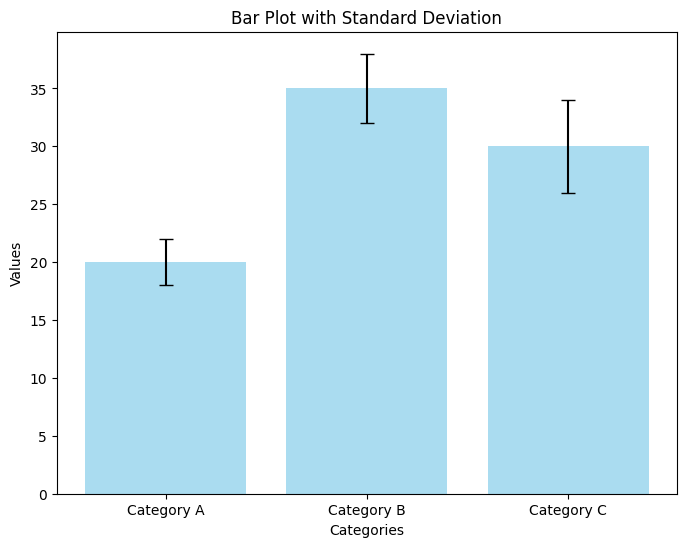

In [49]:
import matplotlib.pyplot as plt
import numpy as np

# Example data
categories = ['Category A', 'Category B', 'Category C']
values = [20, 35, 30]
std_devs = [2, 3, 4]

# Creating the bar plot
plt.figure(figsize=(8, 6))
bar_positions = np.arange(len(categories))
print(bar_positions)
plt.bar(bar_positions, values, yerr=std_devs, capsize=5, color='skyblue', alpha=0.7)
# yerr=std_devs adds the lines
# Adding labels and title
plt.xlabel('Categories')
plt.ylabel('Values')
plt.title('Bar Plot with Standard Deviation')

# this line just puts categories instead of the 0.0 1.0 etc
plt.xticks(bar_positions, categories)
# Show the plot
plt.show()

# **dispersion in view**

<Axes: xlabel='fare', ylabel='Count'>

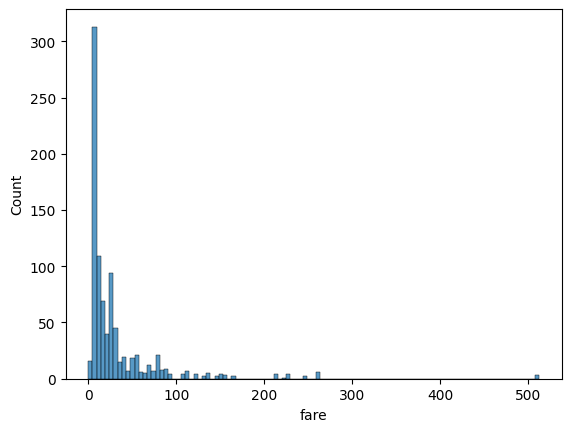

In [21]:
sns.histplot(df['fare'])

(array([732., 106.,  31.,   2.,  11.,   6.,   0.,   0.,   0.,   3.]),
 array([  0.     ,  51.23292, 102.46584, 153.69876, 204.93168, 256.1646 ,
        307.39752, 358.63044, 409.86336, 461.09628, 512.3292 ]),
 <BarContainer object of 10 artists>)

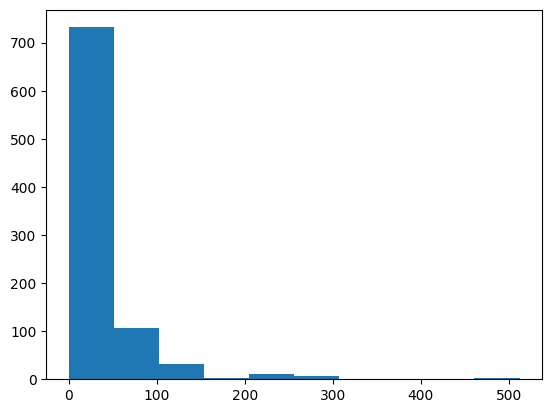

In [22]:
plt.hist(df['fare'])

np.float64(512.3292)